> 1. **[Task 2](#1)**
> 2. **[Import Libraries](#2)**
> 3. **[perform EDA](#3)**
> 4. **[Model Creation](#4)**

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Task 2
    
<a class="anchor" id="1"></a>

In [2]:
"""In this task, you need to predict unit sales without using ad spend data.
You can attach both the PDF of your notebook and the .ipynb file in the sheet below for
that too along with your first task inside the drive"""

'In this task, you need to predict unit sales without using ad spend data.\nYou can attach both the PDF of your notebook and the .ipynb file in the sheet below for\nthat too along with your first task inside the drive'

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Import Libraries    
<a class="anchor" id="2"></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
#import train dataset
data=pd.read_csv("/content/train.csv")

In [4]:
#visit how our data is arrange
data.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0


In [5]:
# Label Encoding all non-numeric columns
label_encoder = LabelEncoder()

# List of columns to label encode (excluding the date, which will be handled separately)
columns_to_encode = ['ID','Item Id', 'Item Name', 'anarix_id']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Converting 'date' to datetime and extracting useful features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Dropping the original 'date' column
data = data.drop(columns=['date'])



In [7]:
"In this task, you need to predict unit sales without using ad spend data. "
"You can attach both the PDF of your notebook and the .ipynb file in the sheet below for that too along with your first task inside the drive"


'You can attach both the PDF of your notebook and the .ipynb file in the sheet below for that too along with your first task inside the drive'

In [8]:
data = data.drop(columns=['ad_spend'])

In [9]:
data.head()

,ID,Item Id,Item Name,anarix_id,units,unit_price,year,month,day
0,0,9,146,0,0.0,0.0,2022,4,12
1,9,25,30,0,0.0,0.0,2022,4,12
2,2,17,158,0,0.0,0.0,2022,4,12
3,3,18,153,0,0.0,0.0,2022,4,12
4,4,19,154,0,0.0,0.0,2022,4,12


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Perform EDA
    
<a class="anchor" id="3"></a>

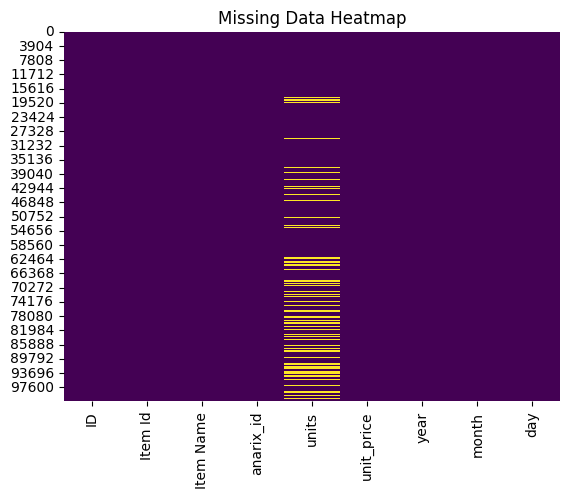

ID             0.000000
Item Id        0.000000
Item Name      0.000000
anarix_id      0.000000
units         17.635235
unit_price     0.000000
year           0.000000
month          0.000000
day            0.000000
dtype: float64


In [10]:
# Visualizing missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Percentage of missing data
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

In [13]:
#Here i try to fill the NA value using differnt methods.
#so I want to comopare each and every method to get the better model

# Example: Compare Mean, Median, and Mode Imputation on Model Performance

# Data with Mean Imputation
data_mean_imputed = data.fillna(data.mean())

# Data with Median Imputation
data_median_imputed = data.fillna(data.median())

# Data with Mode Imputation (for illustration, assuming a categorical approach)
data_mode_imputed = data.fillna(data.mode().iloc[0])

# Splitting the dataset
X_mean = data_mean_imputed.drop(columns=['units'])
y_mean = data_mean_imputed['units']

X_median = data_median_imputed.drop(columns=['units'])
y_median = data_median_imputed['units']

X_mode = data_mode_imputed.drop(columns=['units'])
y_mode = data_mode_imputed['units']

# Train-test split
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

# Training a model (Random Forest as an example)
model = RandomForestRegressor()

model.fit(X_train_mean, y_train_mean)
pred_mean = model.predict(X_test_mean)

model.fit(X_train_median, y_train_median)
pred_median = model.predict(X_test_median)

model.fit(X_train_mode, y_train_mode)
pred_mode = model.predict(X_test_mode)

# Compare Mean Squared Errors
mse_mean = mean_squared_error(y_test_mean, pred_mean)
mse_median = mean_squared_error(y_test_median, pred_median)
mse_mode = mean_squared_error(y_test_mode, pred_mode)

print(f"MSE (Mean Imputation): {mse_mean}")
print(f"MSE (Median Imputation): {mse_median}")
print(f"MSE (Mode Imputation): {mse_mode}")


MSE (Mean Imputation): 1093.3184562518238
MSE (Median Imputation): 835.7985531382403
MSE (Mode Imputation): 1077.8891855207407


In [14]:
dataf = data.fillna(data.median())

# Display the data to verify the changes
dataf.head()

,ID,Item Id,Item Name,anarix_id,units,unit_price,year,month,day
0,0,9,146,0,0.0,0.0,2022,4,12
1,9,25,30,0,0.0,0.0,2022,4,12
2,2,17,158,0,0.0,0.0,2022,4,12
3,3,18,153,0,0.0,0.0,2022,4,12
4,4,19,154,0,0.0,0.0,2022,4,12


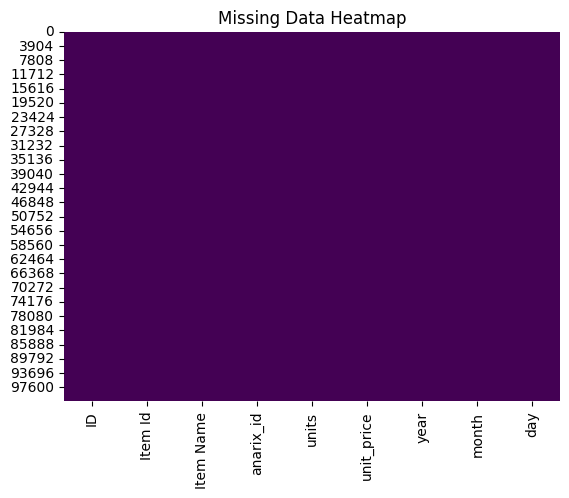

ID            0.0
Item Id       0.0
Item Name     0.0
anarix_id     0.0
units         0.0
unit_price    0.0
year          0.0
month         0.0
day           0.0
dtype: float64


In [15]:
# Visualizing missing data
sns.heatmap(dataf.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Percentage of missing data
missing_percentage = dataf.isnull().mean() * 100
print(missing_percentage)

In [16]:
# Summary statistics for numerical columns
dataf.describe()


,ID,Item Id,Item Name,anarix_id,units,unit_price,year,month,day
count,101490.000000,101490.000000,101490.000000,101490.0,101490.000000,101490.000000,101490.000000,101490.000000,101490.000000
mean,50744.500000,87.349749,114.701084,0.0,8.647059,106.750922,2023.060193,6.051365,15.875692
std,29297.783747,59.366904,56.628864,0.0,62.671795,425.704733,0.612782,3.488440,8.805040
min,0.000000,0.000000,0.000000,0.0,-173.000000,-8232.000000,2022.000000,1.000000,1.000000
25%,25372.250000,35.000000,67.000000,0.0,0.000000,0.000000,2023.000000,3.000000,8.000000
50%,50744.500000,76.000000,126.000000,0.0,1.000000,0.000000,2023.000000,6.000000,16.000000
75%,76116.750000,140.000000,162.000000,0.0,3.000000,0.000000,2023.000000,9.000000,23.000000
max,101489.000000,217.000000,199.000000,0.0,9004.000000,21557.390000,2024.000000,12.000000,31.000000


In [25]:
# Label Encoding all non-numeric columns
label_encoder = LabelEncoder()

# List of columns to label encode (excluding the date, which will be handled separately)
columns_to_encode = ['ID','Item Id', 'Item Name', 'anarix_id']

for column in columns_to_encode:
    dataf[column] = label_encoder.fit_transform(dataf[column])





In [17]:
test_data = pd.read_csv("/content/test.csv")


In [18]:
# Print column names to verify
print(test_data.columns)


Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id',
       'unit_price'],
      dtype='object')


In [19]:
test_data = test_data.drop(columns=['ad_spend'])


In [20]:
# Check if 'date' column is in DataFrame
if 'date' in test_data.columns:
    test_data['date'] = pd.to_datetime(test_data['date'])
    test_data['year'] = test_data['date'].dt.year
    test_data['month'] = test_data['date'].dt.month
    test_data['day'] = test_data['date'].dt.day
    test_data = test_data.drop(columns=['date'])
else:
    print("The 'date' column is not in the DataFrame.")


In [21]:
# Identify numeric columns
numeric_cols = test_data.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the median of each column
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())

# For non-numeric columns, you can fill missing values with a placeholder or other appropriate values
# For example, filling string columns with 'unknown'
non_numeric_cols = test_data.select_dtypes(exclude=['number']).columns
test_data[non_numeric_cols] = test_data[non_numeric_cols].fillna('unknown')

# Verify changes
test_data.head()


,ID,Item Id,Item Name,anarix_id,unit_price,year,month,day
0,2024-07-01_B09KDR64LT,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",NAPQUEEN,0.0,2024,7,1
1,2024-07-01_B09KDTS4DC,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NAPQUEEN,0.0,2024,7,1
2,2024-07-01_B09KDTHJ6V,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NAPQUEEN,0.0,2024,7,1
3,2024-07-01_B09KDQ2BWY,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NAPQUEEN,0.0,2024,7,1
4,2024-07-01_B09KDYY3SB,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",NAPQUEEN,1094.5,2024,7,1


In [22]:
# Label Encoding all non-numeric columns
label_encoder = LabelEncoder()

# List of columns to label encode (excluding the date, which will be handled separately)
columns_to_encode = ['ID','Item Id', 'Item Name', 'anarix_id']

for column in columns_to_encode:
    test_data[column] = label_encoder.fit_transform(test_data[column])





<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Model Creation
    
<a class="anchor" id="4"></a>

In [24]:
#Apply preprocessing to both datasets
train_data = dataf
test_data = test_data


In [28]:
# Feature and target columns
features = ['year', 'month', 'day', 'Item Id']
target = 'units'


In [29]:
# Prepare train dataset
X_train = train_data[features].values
y_train = train_data[target].values

# Prepare test dataset (no target variable)
X_test = test_data[features].values

# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scaling target variable
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Reshape the data for RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [30]:
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (101490, 1, 4)
X_test shape: (2833, 1, 4)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def build_rnn_model(units=50, learning_rate=0.001, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units, activation=activation, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Hyperparameters to tune
units_list = [20, 50, 100]
learning_rate_list = [0.001, 0.01]
activation_list = ['relu', 'tanh']

for units in units_list:
    for learning_rate in learning_rate_list:
        for activation in activation_list:
            print(f'Tuning model with units={units}, learning_rate={learning_rate}, activation={activation}')

            # Build and compile model
            model = build_rnn_model(units=units, learning_rate=learning_rate, activation=activation)

            # Train model
            history = model.fit(
                X_train, y_train,
                epochs=50,
                validation_split=0.2,
                verbose=1,
                callbacks=[early_stopping]
            )

            # Evaluate model
            train_mse = model.evaluate(X_train, y_train, verbose=0)
            print(f'MSE on training data for RNN with units={units}, learning_rate={learning_rate}, activation={activation}: {train_mse}')


Tuning model with units=20, learning_rate=0.001, activation=relu
Epoch 1/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0189 - val_loss: 0.0017
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 8.2430e-05 - val_loss: 8.0315e-04
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.3642e-05 - val_loss: 4.2996e-04
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.8251e-05 - val_loss: 1.9143e-04
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 4.4605e-05 - val_loss: 1.2132e-04
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 4.3253e-05 - val_loss: 1.0206e-04
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.0708e-05 - val_loss: 8.5950e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.3990e-05 - val_loss: 7.2012e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.9187e-05 - val_loss: 5.1803e-05
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.1710e-05 - v

In [33]:
#import train dataset
d=pd.read_csv("/content/test.csv")

In [38]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Load train and test datasets
train_data = dataf
test_data = test_data

# Define features and target
features = ['year', 'month', 'day', 'Item Id']
target = 'units'

# Initialize scalers
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

# Prepare train and test data
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])
y_train = scaler_y.fit_transform(train_data[target].values.reshape(-1, 1))

# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build and compile RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train RNN model
history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)




Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.6293e-04 - val_loss: 6.4794e-05
Epoch 2/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6.7363e-05 - val_loss: 3.7326e-05
Epoch 3/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 7.9953e-05 - val_loss: 3.3922e-05
Epoch 4/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.3595e-05 - val_loss: 8.4043e-05
Epoch 5/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.6634e-05 - val_loss: 7.0253e-05
Epoch 6/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.6766e-05 - val_loss: 4.9906e-05
Epoch 7/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 8.1727e-05 - val_loss: 5.4315e-05
Epoch 8/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 9.2378e-05 - val_loss: 3.5036e-05
Epoch 9/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.1032e-04 - val_loss: 4.0549e-05
Epoch 10/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.7074e-05 - val_loss: 3.1135e-05
Epoch 11/50
2538/2538 ━━━━━━━━━━━━━━━━━━━━ 6s 3

In [39]:
# Make predictions on the test data
y_pred_scaled = rnn_model.predict(X_test)

# Rescale the predicted values back to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)

# Combine the 'ID' column from test_data with the predicted values
results = pd.DataFrame({
    'ID': d['ID'],  # Make sure this matches the actual ID column in your test data
    'TARGET': y_pred_rescaled.flatten()
})

# Save the results to a CSV file
results.to_csv('prediction.csv', index=False)

print('Predictions saved to "prediction.csv".')

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions saved to "prediction.csv".
